# Vinted

## Step 1 - Import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

data_path = "/Users/qxzjy/vscworkspace/dse-ft-100/python_module/data/"

## Step 2 - Import Dataset

In [3]:
vinted_df = pd.read_csv(data_path + "vinted_website_optimization.csv")
vinted_df.head()

,Feature_A,Feature_B
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


## Step 3 - EDA

In [15]:
mean_a = vinted_df.Feature_A.mean()
mean_b = vinted_df.Feature_B.mean()

variation_a = vinted_df.Feature_A.std()
variation_b = vinted_df.Feature_B.std()

n_a = len(vinted_df.Feature_A)
n_b = len(vinted_df.Feature_B)

print(f"Feature_A mean / std / n : {mean_a} / {variation_a} / {n_a}")
print(f"Feature_B mean / std / n : {mean_b} / {variation_b} / {n_b}")

Feature_A mean / std / n : 0.086 / 0.28064483434777876 / 500
Feature_B mean / std / n : 0.126 / 0.33218171138513464 / 500


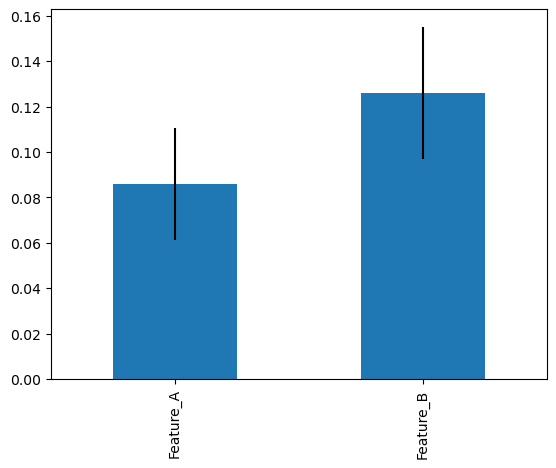

In [12]:
t = 1.96
n = len(vinted_df)
E = t*vinted_df.std()/np.sqrt(n)

axes = vinted_df.mean().plot(kind="bar", yerr=E)

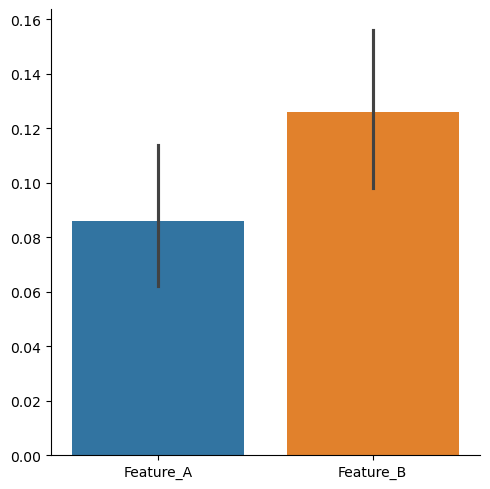

In [26]:
# With seaborn
# => handier because we don't need to calculate the confidence interval
sns.catplot(data=vinted_df, kind="bar", errorbar=('ci', 95))

## Step 4 - Test

In [18]:
calculated_z_score = (mean_b - mean_a) / np.sqrt((variation_b**2/n_b) + (variation_a**2/n_a))
print(f"Z-score : {calculated_z_score}")

Z-score : 2.0568001501604347


## Step 5- Set α

In [19]:
alpha = 0.05
print(f"Confidence level (alpha) = {alpha}")

Confidence level (alpha) = 0.5


## Step 5 - Compare p-value to α

In [22]:
# Using ztest function from the statsmodels.stats.weightstat library
z_score, p_value = ztest(vinted_df.Feature_B, vinted_df.Feature_A, alternative='larger', value=0)

print("Z_score : {}".format(z_score))
print("p-value : {}".format(p_value))

if p_value < alpha:
    print(f"Null hypothesis H0 rejected")
else:
    print("Null hypothesis H0 not rejected")

Z_score : 2.056800150160431
p-value : 0.01985272682291228
Null hypothesis H0 rejected


## Step 8 (Optional) - Visualize probability

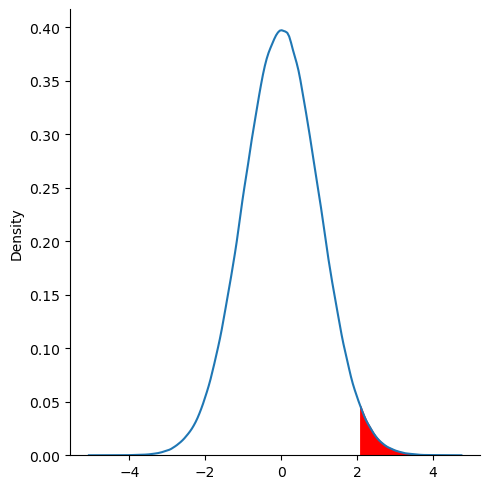

In [23]:
# Distplot from seaborn gives us a distribution from what is inside the parenthesis
# => Dispolot is deprecated, we're going to use Displot instead
# np.random.normal simulates a normal distribution 
# hist=None simply stats that we don't want a histogram
# => Deprecated attribute, we're using kind="kde" which is the same as a kdeplot(kernel density estimation)
ax = sns.displot(np.random.normal(0, 1, size=1000000), kind="kde") 

# => Since Displot isn't working exactly like Distplot, we need to access the matplotlib axes differently
axes = ax.axes[0, 0]

# This is a mask that will let us filter only the values beyond z-score
mask = axes.lines[0].get_xydata()[:, 0] > z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = axes.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = axes.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
axes.fill_between(x_area_under_curve, y_area_under_curve, color="red")

plt.show()